# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
import pandas as pd
preprocessed_data = pd.read_csv('preprocessed_data.csv')
y=preprocessed_data.project_is_approved
X = preprocessed_data
#print(X.columns)

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import Callback
from keras.models import load_model
%matplotlib inline


# define roc_callback, inspired by https://github.com/keras-team/keras/issues/6050#issuecomment-329996505
def auc_roc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

#method which converts pandas series to one hot encoded numpy array
def dfToTokenize(x,vocab):
    result=np.zeros(shape=(x.shape[0],1))
    for a,b in enumerate(x.values):
        try:
            result[a] = vocab.index(b)+1
        except:
            result[a] = 0
    return result

Using TensorFlow backend.


In [3]:
# xx = dfToTokenize(X_train.school_state,X_train.school_state.unique().tolist())
# print(xx.shape)
# print(xx)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>2.2.2 Numerical features </h2>

In [5]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
# Now standardize the data with above maen and variance.
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))


Mean : 297.9976013181079, Standard deviation : 367.694468186091


In [6]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,normalize

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized_train = price_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized_test = price_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.105425753449735, Standard deviation : 27.570611837989286


# Model1

In [7]:
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(X_train.essay)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs_text_train = t.texts_to_sequences(X_train.essay)
#print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 600
padded_docs_text_train = pad_sequences(encoded_docs_text_train, maxlen=max_length, padding='pre')
#print(padded_docs[0])
print(len(padded_docs_text_train))
print(len(padded_docs_text_train[0]))

# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.42B.300d.txt', 'r', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

87398
600
Loaded 1917495 word vectors.


In [8]:
encoded_docs_text_test = t.texts_to_sequences(X_test.essay)
#print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 600
padded_docs_text_test = pad_sequences(encoded_docs_text_test, maxlen=max_length, padding='pre')
#print(padded_docs[0])
print(len(padded_docs_text_train))
print(len(padded_docs_text_train[0]))

87398
600


In [9]:
from keras.layers import Input, Embedding, LSTM, Dense, concatenate, Flatten
from keras.models import Model
first_input = Input(shape=(600,))
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=600, trainable=False)(first_input)
lstm_out=LSTM(32)(e)

W0901 23:53:05.547688  7292 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0901 23:53:05.614509  7292 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:519: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 23:53:05.631468  7292 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4140: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0901 23:53:05.656401  7292 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_defaul

In [10]:
encoded_docs_school_state_train = dfToTokenize(X_train.school_state,X_train.school_state.unique().tolist())
print(encoded_docs_school_state_train.shape)
encoded_docs_school_state_test = dfToTokenize(X_test.school_state,X_train.school_state.unique().tolist())


encoded_docs_project_grade_category_train = dfToTokenize(X_train.project_grade_category,X_train.project_grade_category.unique().tolist())
encoded_docs_project_grade_category_test = dfToTokenize(X_test.project_grade_category,X_train.project_grade_category.unique().tolist())


encoded_docs_clean_categories_train = dfToTokenize(X_train.clean_categories,X_train.clean_categories.unique().tolist())
encoded_docs_clean_categories_test = dfToTokenize(X_test.clean_categories,X_train.clean_categories.unique().tolist())


encoded_docs_clean_subcategories_train = dfToTokenize(X_train.clean_subcategories,X_train.clean_subcategories.unique().tolist())
encoded_docs_clean_subcategories_test = dfToTokenize(X_test.clean_subcategories,X_train.clean_subcategories.unique().tolist())

encoded_docs_teacher_prefix_train = dfToTokenize(X_train.teacher_prefix,X_train.teacher_prefix.unique().tolist())
encoded_docs_teacher_prefix_test = dfToTokenize(X_test.teacher_prefix,X_train.teacher_prefix.unique().tolist())


(87398, 1)


In [11]:
from keras.layers.merge import concatenate
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout

vocab_size1 = len(X_train.school_state.unique().tolist()) + 1
model1_in = Input(shape=(1,))
x = Embedding(vocab_size1 ,10,input_shape=(vocab_size1,))(model1_in)
model1_out = Flatten()(x)
model1 = Model(model1_in, model1_out)
#print(model1.summary())



vocab_size2 = len(X_train.project_grade_category.unique().tolist()) + 1
model2_in = Input(shape=(1,))
y = Embedding(vocab_size2 ,10,input_shape=(vocab_size2,))(model2_in)
model2_out = Flatten()(y)
model2 = Model(model2_in, model2_out)
#print(model2.summary())


vocab_size3 = len(X_train.clean_categories.unique().tolist())  + 1
model3_in = Input(shape=(encoded_docs_clean_categories_train.shape[1],))
y = Embedding(vocab_size3 ,10,input_shape=(vocab_size3,))(model3_in)
model3_out = Flatten()(y)
model3 = Model(model3_in, model3_out)


vocab_size4 = len(X_train.clean_subcategories.unique().tolist()) + 1
model4_in = Input(shape=(encoded_docs_clean_subcategories_train.shape[1],))
y = Embedding(vocab_size4 ,10,input_shape=(vocab_size4,))(model4_in)
model4_out = Flatten()(y)
model4 = Model(model4_in, model4_out)



vocab_size5 = len(X_train.teacher_prefix.unique().tolist()) + 1
model5_in = Input(shape=(encoded_docs_teacher_prefix_train.shape[1],))
y = Embedding(vocab_size5 ,10,input_shape=(vocab_size5,))(model5_in)
model5_out = Flatten()(y)
model5 = Model(model5_in, model5_out)


model6_in = Input(shape=(2,))
model6_out = Dense(5, activation='relu')(model6_in)

In [12]:
concatenated = concatenate([lstm_out, model1_out, model2_out, model3_out, model4_out, model5_out, model6_out])
intermediate_out = Dense(1024, activation='relu')(concatenated)
out=Dropout(0.3)(intermediate_out)
out=Dense(512, activation='relu')(out)
out=Dropout(0.3)(out)
out=Dense(128, activation='relu')(out)
out=Dense(1, activation='sigmoid', name='main_output')(out)

merged_model1 = Model(inputs= [first_input,model1_in, model2_in, model3_in, model4_in, model5_in, model6_in], outputs=[out])
print(merged_model1.summary())

W0901 23:53:09.587028  7292 deprecation.py:506] From C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3447: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 600)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_5 (I

In [13]:
from time import time
from keras.callbacks import TensorBoard
tensorboard=TensorBoard(log_dir="logs\{}".format(time()))


In [14]:
merged_model1.compile(optimizer='adam', loss='binary_crossentropy',metrics=["accuracy",auc_roc])

W0901 23:53:11.960052  7292 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0901 23:53:12.004928  7292 deprecation.py:323] From C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0901 23:53:12.025873  7292 deprecation.py:323] From <ipython-input-2-cdb340bebd3a>:15: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
   

In [15]:
import keras
from keras.callbacks import Callback
from sklearn.metrics import roc_auc_score
from keras.callbacks import ModelCheckpoint
     
filepath="weights-improvement-model1.hdf5"
checkpoint = ModelCheckpoint(filepath, verbose=1,monitor="val_auc_roc", save_best_only=True, mode='max')
callbacks_list = [tensorboard,checkpoint]

In [16]:
merged_model1.fit([padded_docs_text_train, encoded_docs_school_state_train, encoded_docs_project_grade_category_train, encoded_docs_clean_categories_train, encoded_docs_clean_subcategories_train, encoded_docs_teacher_prefix_train, X_train[['teacher_number_of_previously_posted_projects','price']].as_matrix()], [y_train],epochs=30, batch_size=1024,callbacks=callbacks_list,validation_split=0.2)

C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Train on 69918 samples, validate on 17480 samples


W0901 23:53:14.185401  7292 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\keras\callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0901 23:53:14.185401  7292 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\keras\callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/30
69918/69918 [==============================] - 65s 933us/step - loss: 1.0138 - acc: 0.8047 - auc_roc: 0.4959 - val_loss: 0.4288 - val_acc: 0.8468 - val_auc_roc: 0.5748

Epoch 00001: val_auc_roc improved from -inf to 0.57475, saving model to weights-improvement-model1.hdf5
Epoch 2/30
69918/69918 [==============================] - 64s 921us/step - loss: 0.4473 - acc: 0.8425 - auc_roc: 0.5571 - val_loss: 0.4211 - val_acc: 0.8468 - val_auc_roc: 0.6181

Epoch 00002: val_auc_roc improved from 0.57475 to 0.61809, saving model to weights-improvement-model1.hdf5
Epoch 3/30
69918/69918 [==============================] - 65s 923us/step - loss: 0.4184 - acc: 0.8458 - auc_roc: 0.6348 - val_loss: 0.3983 - val_acc: 0.8468 - val_auc_roc: 0.7120

Epoch 00003: val_auc_roc improved from 0.61809 to 0.71203, saving model to weights-improvement-model1.hdf5
Epoch 4/30
69918/69918 [==============================] - 65s 926us/step - loss: 0.3953 - acc: 0.8473 - auc_roc: 0.7015 - val_loss: 0.3834 - v

In [17]:
merged_model1 = load_model('weights-improvement-model1.hdf5', custom_objects={'auc_roc': auc_roc})

In [18]:
result1_test = merged_model1.predict(x=[padded_docs_text_test, encoded_docs_school_state_test, encoded_docs_project_grade_category_test, encoded_docs_clean_categories_test, encoded_docs_clean_subcategories_test, encoded_docs_teacher_prefix_test, X_test[['teacher_number_of_previously_posted_projects','price']].as_matrix()])

C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [19]:
result1_train = merged_model1.predict(x=[padded_docs_text_train, encoded_docs_school_state_train, encoded_docs_project_grade_category_train, encoded_docs_clean_categories_train, encoded_docs_clean_subcategories_train, encoded_docs_teacher_prefix_train, X_train[['teacher_number_of_previously_posted_projects','price']].as_matrix()])

C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


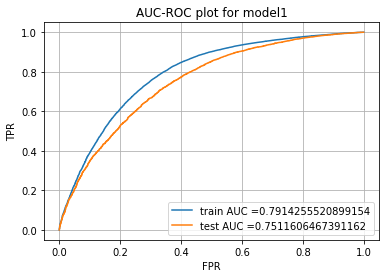

In [20]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, result1_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, result1_test)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC plot for model1")
plt.grid()
plt.show()

# Model2

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train.essay.values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
essay_tfidf_words = set(tfidf_model.get_feature_names())

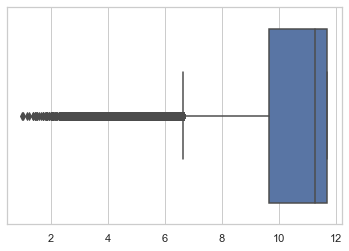

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
ax = sns.boxplot(x=list(tfidf_model.idf_))
plt.show()

`I have decoded to take tf-idf 2.0 to  11.2`

In [23]:
from tqdm import tqdm
filtered_via_tfidf_train = []; 
for sentence in tqdm(X_train.essay.values): # for each review/sentence
#     print(sentence)
#     print("*************************")
    temp=''
    for word in sentence.split(): # for each word in a review/sentence
        if word in essay_tfidf_words and dictionary[word]>=2.0 and dictionary[word]<=11.0:
            temp+=word
            temp+=' '
        else:
            pass
    #print(temp)
#     print("*************************")
    filtered_via_tfidf_train.append(temp)




100%|██████████████████████████████████████████████████████████████████████████| 87398/87398 [00:14<00:00, 6028.53it/s]


In [24]:
print(dictionary['considerations'])
print(X_train.essay.values[1007])
print("*************************")
print(filtered_via_tfidf_train[1007])

9.605650397690793
my students walk classroom every day full life ready learn excited store day i want know i believe anything they like move love read love lots positive attention from minute walk door classroom i focus potential growth i may not able control home lives however i certainly control experience school day by creative positive way i hopeful inspire even earliest learners continue path academic excellence i want set classroom encourages choice empowerment children my classroom based mainly around language arts math science social studies 3rd grade setting we many group projects discussions experiments research also independent learning i 28 students class currently ethnic backgrounds also diverse socio economic landscape with nationwide push giving students choice classroom personal control learning not giving consideration seating think learned best school was sitting rigid desk chair stretched across bed belly maybe propped pillows even standing i love idea giving student

In [25]:
X_train_copy=X_train
X_test_copy=X_test
print(X_train.essay.loc[0])
X_train.essay=filtered_via_tfidf_train
print(X_train.essay.loc[0])

i fortunate enough use fairy tale stem kits classroom well stem journals students really enjoyed i would love implement lakeshore stem kits classroom next school year provide excellent engaging stem lessons my students come variety backgrounds including language socioeconomic status many not lot experience science engineering kits give materials provide exciting opportunities students each month i try several science stem steam projects i would use kits robot help guide science instruction engaging meaningful ways i adapt kits current language arts pacing guide already teach material kits like tall tales paul bunyan johnny appleseed the following units taught next school year i implement kits magnets motion sink vs float robots i often get units not know if i teaching right way using right materials the kits give additional ideas strategies lessons prepare students science it challenging develop high quality science activities these kits give materials i need provide students science a

C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


fortunate enough fairy tale stem kits well stem journals really enjoyed would implement lakeshore stem kits next year provide excellent engaging stem lessons variety backgrounds including language socioeconomic status lot experience science engineering kits give materials provide exciting opportunities each month try several science stem steam projects would kits robot guide science instruction engaging meaningful ways adapt kits current language arts pacing guide already teach material kits like tall tales paul bunyan johnny appleseed following units taught next year implement kits magnets motion sink vs float robots often get units know if teaching right way using right materials kits give additional ideas strategies lessons prepare science it challenging develop high quality science activities these kits give materials provide science activities go along curriculum although things like magnets know effectively kits provide right amount materials show appropriate way 


In [26]:
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(X_train.essay)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs_text_train = t.texts_to_sequences(X_train.essay)
#print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 600
padded_docs_text_train = pad_sequences(encoded_docs_text_train, maxlen=max_length, padding='pre')
#print(padded_docs[0])
print(len(padded_docs_text_train))
print(len(padded_docs_text_train[0]))

# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.42B.300d.txt', 'r', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

87398
600
Loaded 1917495 word vectors.


In [27]:
encoded_docs_text_test = t.texts_to_sequences(X_test.essay)
#print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 600
padded_docs_text_test = pad_sequences(encoded_docs_text_test, maxlen=max_length, padding='pre')
#print(padded_docs[0])
print(len(padded_docs_text_train))
print(len(padded_docs_text_train[0]))

87398
600


In [28]:
from keras.layers import Input, Embedding, LSTM, Dense, concatenate, Flatten
from keras.models import Model
first_input = Input(shape=(600,))
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=600, trainable=False)(first_input)
lstm_out=LSTM(32)(e)

In [29]:
encoded_docs_school_state_train = dfToTokenize(X_train.school_state,X_train.school_state.unique().tolist())
encoded_docs_school_state_test = dfToTokenize(X_test.school_state,X_train.school_state.unique().tolist())


encoded_docs_project_grade_category_train = dfToTokenize(X_train.project_grade_category,X_train.project_grade_category.unique().tolist())
encoded_docs_project_grade_category_test = dfToTokenize(X_test.project_grade_category,X_train.project_grade_category.unique().tolist())


encoded_docs_clean_categories_train = dfToTokenize(X_train.clean_categories,X_train.clean_categories.unique().tolist())
encoded_docs_clean_categories_test = dfToTokenize(X_test.clean_categories,X_train.clean_categories.unique().tolist())


encoded_docs_clean_subcategories_train = dfToTokenize(X_train.clean_subcategories,X_train.clean_subcategories.unique().tolist())
encoded_docs_clean_subcategories_test = dfToTokenize(X_test.clean_subcategories,X_train.clean_subcategories.unique().tolist())

encoded_docs_teacher_prefix_train = dfToTokenize(X_train.teacher_prefix,X_train.teacher_prefix.unique().tolist())
encoded_docs_teacher_prefix_test = dfToTokenize(X_test.teacher_prefix,X_train.teacher_prefix.unique().tolist())

In [30]:
from keras.layers.merge import concatenate
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout


vocab_size1 = len(X_train.school_state.unique().tolist()) + 1
model1_in = Input(shape=(encoded_docs_school_state_train.shape[1],))
x = Embedding(vocab_size1 ,10,input_shape=(vocab_size1,))(model1_in)
model1_out = Flatten()(x)
model1 = Model(model1_in, model1_out)


vocab_size2 = len(X_train.project_grade_category.unique().tolist()) + 1
model2_in = Input(shape=(encoded_docs_project_grade_category_train.shape[1],))
y = Embedding(vocab_size2 ,10,input_shape=(vocab_size2,))(model2_in)
model2_out = Flatten()(y)
model2 = Model(model2_in, model2_out)


vocab_size3 = len(X_train.clean_categories.unique().tolist()) + 1
model3_in = Input(shape=(encoded_docs_clean_categories_train.shape[1],))
y = Embedding(vocab_size3 ,10,input_shape=(vocab_size3,))(model3_in)
model3_out = Flatten()(y)
model3 = Model(model3_in, model3_out)


vocab_size4 = len(X_train.clean_subcategories.unique().tolist()) + 1
model4_in = Input(shape=(encoded_docs_clean_subcategories_train.shape[1],))
y = Embedding(vocab_size4 ,10,input_shape=(vocab_size4,))(model4_in)
model4_out = Flatten()(y)
model4 = Model(model4_in, model4_out)


vocab_size5 = len(X_train.teacher_prefix.unique().tolist()) + 1
model5_in = Input(shape=(encoded_docs_teacher_prefix_train.shape[1],))
y = Embedding(vocab_size5 ,10,input_shape=(vocab_size5,))(model5_in)
model5_out = Flatten()(y)
model5 = Model(model5_in, model5_out)


model6_in = Input(shape=(2,))
model6_out = Dense(5, activation='relu')(model6_in)

In [31]:
concatenated = concatenate([lstm_out, model1_out, model2_out, model3_out, model4_out, model5_out, model6_out])
intermediate_out = Dense(1024, activation='relu')(concatenated)
out=Dropout(0.3)(intermediate_out)
out=Dense(512, activation='relu')(out)
out=Dropout(0.3)(out)
out=Dense(128, activation='relu')(out)
out=Dense(1, activation='sigmoid', name='main_output')(out)

merged_model2 = Model(inputs= [first_input,model1_in, model2_in, model3_in, model4_in, model5_in, model6_in], outputs=[out])
print(merged_model2.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 600)          0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_12 (

In [32]:
from time import time
from keras.callbacks import TensorBoard
tensorboard=TensorBoard(log_dir="logs\{}".format(time()))


In [33]:
import keras
merged_model2.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='binary_crossentropy',metrics=["accuracy",auc_roc])

In [34]:
from keras.callbacks import ModelCheckpoint
filepath="weights-improvement-model2.hdf5"
checkpoint = ModelCheckpoint(filepath, verbose=1,monitor="val_auc_roc", save_best_only=True, mode='max')
callbacks_list = [tensorboard,checkpoint]

In [35]:
merged_model2.fit([padded_docs_text_train, encoded_docs_school_state_train, encoded_docs_project_grade_category_train, encoded_docs_clean_categories_train, encoded_docs_clean_subcategories_train, encoded_docs_teacher_prefix_train, X_train[['teacher_number_of_previously_posted_projects','price']].as_matrix()], [y_train],epochs=30, batch_size=1024,callbacks=callbacks_list,validation_split=0.2)

C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Train on 69918 samples, validate on 17480 samples
Epoch 1/30
69918/69918 [==============================] - ETA: 2:35 - loss: 1.6922 - acc: 0.4736 - auc_roc: 0.514 - ETA: 1:50 - loss: 1.4713 - acc: 0.5898 - auc_roc: 0.480 - ETA: 1:34 - loss: 1.3334 - acc: 0.6628 - auc_roc: 0.475 - ETA: 1:25 - loss: 1.2802 - acc: 0.7068 - auc_roc: 0.467 - ETA: 1:19 - loss: 1.2583 - acc: 0.7344 - auc_roc: 0.462 - ETA: 1:15 - loss: 1.2703 - acc: 0.7503 - auc_roc: 0.454 - ETA: 1:14 - loss: 1.2589 - acc: 0.7616 - auc_roc: 0.455 - ETA: 1:11 - loss: 1.2285 - acc: 0.7744 - auc_roc: 0.453 - ETA: 1:10 - loss: 1.2216 - acc: 0.7795 - auc_roc: 0.448 - ETA: 1:09 - loss: 1.2132 - acc: 0.7840 - auc_roc: 0.442 - ETA: 1:07 - loss: 1.1953 - acc: 0.7844 - auc_roc: 0.442 - ETA: 1:07 - loss: 1.1923 - acc: 0.7808 - auc_roc: 0.443 - ETA: 1:06 - loss: 1.1776 - acc: 0.7762 - auc_roc: 0.445 - ETA: 1:04 - loss: 1.1671 - acc: 0.7697 - auc_roc: 0.450 - ETA: 1:02 - loss: 1.1628 - acc: 0.7622 - auc_roc: 0.450 - ETA: 1:00 - loss: 1.15

Epoch 00004: val_auc_roc did not improve from 0.55868
Epoch 5/30
69918/69918 [==============================] - ETA: 52s - loss: 0.4458 - acc: 0.8457 - auc_roc: 0.56 - ETA: 52s - loss: 0.4522 - acc: 0.8433 - auc_roc: 0.54 - ETA: 51s - loss: 0.4648 - acc: 0.8428 - auc_roc: 0.53 - ETA: 50s - loss: 0.4769 - acc: 0.8359 - auc_roc: 0.53 - ETA: 49s - loss: 0.4756 - acc: 0.8342 - auc_roc: 0.53 - ETA: 49s - loss: 0.4751 - acc: 0.8328 - auc_roc: 0.54 - ETA: 48s - loss: 0.4736 - acc: 0.8323 - auc_roc: 0.54 - ETA: 47s - loss: 0.4738 - acc: 0.8323 - auc_roc: 0.54 - ETA: 47s - loss: 0.4720 - acc: 0.8334 - auc_roc: 0.54 - ETA: 46s - loss: 0.4707 - acc: 0.8341 - auc_roc: 0.54 - ETA: 45s - loss: 0.4667 - acc: 0.8350 - auc_roc: 0.55 - ETA: 44s - loss: 0.4709 - acc: 0.8329 - auc_roc: 0.55 - ETA: 44s - loss: 0.4689 - acc: 0.8343 - auc_roc: 0.54 - ETA: 43s - loss: 0.4663 - acc: 0.8354 - auc_roc: 0.55 - ETA: 42s - loss: 0.4658 - acc: 0.8355 - auc_roc: 0.55 - ETA: 41s - loss: 0.4658 - acc: 0.8356 - auc_roc:

Epoch 00008: val_auc_roc improved from 0.61192 to 0.62704, saving model to weights-improvement-model2.hdf5
Epoch 9/30
69918/69918 [==============================] - ETA: 1:05 - loss: 0.4213 - acc: 0.8477 - auc_roc: 0.618 - ETA: 1:03 - loss: 0.4254 - acc: 0.8467 - auc_roc: 0.603 - ETA: 1:00 - loss: 0.4250 - acc: 0.8467 - auc_roc: 0.598 - ETA: 58s - loss: 0.4277 - acc: 0.8462 - auc_roc: 0.594 - ETA: 57s - loss: 0.4307 - acc: 0.8453 - auc_roc: 0.58 - ETA: 56s - loss: 0.4380 - acc: 0.8420 - auc_roc: 0.58 - ETA: 55s - loss: 0.4385 - acc: 0.8418 - auc_roc: 0.58 - ETA: 54s - loss: 0.4362 - acc: 0.8425 - auc_roc: 0.58 - ETA: 53s - loss: 0.4339 - acc: 0.8441 - auc_roc: 0.58 - ETA: 52s - loss: 0.4339 - acc: 0.8445 - auc_roc: 0.58 - ETA: 51s - loss: 0.4332 - acc: 0.8444 - auc_roc: 0.58 - ETA: 50s - loss: 0.4349 - acc: 0.8441 - auc_roc: 0.58 - ETA: 49s - loss: 0.4346 - acc: 0.8439 - auc_roc: 0.58 - ETA: 48s - loss: 0.4347 - acc: 0.8436 - auc_roc: 0.58 - ETA: 47s - loss: 0.4348 - acc: 0.8436 - auc_


Epoch 00010: val_auc_roc improved from 0.66597 to 0.68707, saving model to weights-improvement-model2.hdf5
Epoch 11/30
69918/69918 [==============================] - ETA: 1:09 - loss: 0.4208 - acc: 0.8447 - auc_roc: 0.633 - ETA: 1:08 - loss: 0.4361 - acc: 0.8340 - auc_roc: 0.638 - ETA: 1:06 - loss: 0.4243 - acc: 0.8359 - auc_roc: 0.665 - ETA: 1:05 - loss: 0.4140 - acc: 0.8428 - auc_roc: 0.663 - ETA: 1:05 - loss: 0.4189 - acc: 0.8402 - auc_roc: 0.661 - ETA: 1:03 - loss: 0.4212 - acc: 0.8397 - auc_roc: 0.656 - ETA: 1:03 - loss: 0.4207 - acc: 0.8396 - auc_roc: 0.657 - ETA: 1:01 - loss: 0.4160 - acc: 0.8427 - auc_roc: 0.656 - ETA: 1:00 - loss: 0.4177 - acc: 0.8422 - auc_roc: 0.655 - ETA: 59s - loss: 0.4183 - acc: 0.8420 - auc_roc: 0.655 - ETA: 59s - loss: 0.4165 - acc: 0.8426 - auc_roc: 0.65 - ETA: 57s - loss: 0.4122 - acc: 0.8443 - auc_roc: 0.66 - ETA: 56s - loss: 0.4114 - acc: 0.8454 - auc_roc: 0.65 - ETA: 55s - loss: 0.4115 - acc: 0.8457 - auc_roc: 0.65 - ETA: 54s - loss: 0.4126 - acc:


Epoch 00012: val_auc_roc improved from 0.70163 to 0.71028, saving model to weights-improvement-model2.hdf5
Epoch 13/30
69918/69918 [==============================] - ETA: 57s - loss: 0.3761 - acc: 0.8594 - auc_roc: 0.70 - ETA: 58s - loss: 0.3621 - acc: 0.8623 - auc_roc: 0.73 - ETA: 58s - loss: 0.3767 - acc: 0.8551 - auc_roc: 0.72 - ETA: 57s - loss: 0.3784 - acc: 0.8564 - auc_roc: 0.71 - ETA: 56s - loss: 0.3753 - acc: 0.8580 - auc_roc: 0.71 - ETA: 56s - loss: 0.3777 - acc: 0.8560 - auc_roc: 0.71 - ETA: 55s - loss: 0.3802 - acc: 0.8552 - auc_roc: 0.70 - ETA: 55s - loss: 0.3834 - acc: 0.8538 - auc_roc: 0.70 - ETA: 54s - loss: 0.3876 - acc: 0.8513 - auc_roc: 0.70 - ETA: 54s - loss: 0.3924 - acc: 0.8490 - auc_roc: 0.69 - ETA: 53s - loss: 0.3940 - acc: 0.8481 - auc_roc: 0.69 - ETA: 53s - loss: 0.3950 - acc: 0.8485 - auc_roc: 0.69 - ETA: 52s - loss: 0.3929 - acc: 0.8492 - auc_roc: 0.69 - ETA: 51s - loss: 0.3926 - acc: 0.8493 - auc_roc: 0.69 - ETA: 50s - loss: 0.3924 - acc: 0.8495 - auc_roc: 


Epoch 00014: val_auc_roc improved from 0.71342 to 0.72506, saving model to weights-improvement-model2.hdf5
Epoch 15/30
69918/69918 [==============================] - ETA: 58s - loss: 0.4156 - acc: 0.8428 - auc_roc: 0.66 - ETA: 58s - loss: 0.4047 - acc: 0.8447 - auc_roc: 0.69 - ETA: 57s - loss: 0.4016 - acc: 0.8428 - auc_roc: 0.70 - ETA: 56s - loss: 0.3984 - acc: 0.8420 - auc_roc: 0.71 - ETA: 56s - loss: 0.3982 - acc: 0.8424 - auc_roc: 0.71 - ETA: 55s - loss: 0.3953 - acc: 0.8433 - auc_roc: 0.71 - ETA: 54s - loss: 0.3977 - acc: 0.8403 - auc_roc: 0.71 - ETA: 53s - loss: 0.4011 - acc: 0.8398 - auc_roc: 0.71 - ETA: 52s - loss: 0.4040 - acc: 0.8397 - auc_roc: 0.70 - ETA: 51s - loss: 0.4061 - acc: 0.8385 - auc_roc: 0.70 - ETA: 50s - loss: 0.4053 - acc: 0.8402 - auc_roc: 0.69 - ETA: 49s - loss: 0.4047 - acc: 0.8409 - auc_roc: 0.69 - ETA: 48s - loss: 0.4031 - acc: 0.8423 - auc_roc: 0.69 - ETA: 47s - loss: 0.4019 - acc: 0.8428 - auc_roc: 0.69 - ETA: 46s - loss: 0.4024 - acc: 0.8425 - auc_roc: 


Epoch 00016: val_auc_roc improved from 0.72666 to 0.73014, saving model to weights-improvement-model2.hdf5
Epoch 17/30
69918/69918 [==============================] - ETA: 1:01 - loss: 0.3658 - acc: 0.8525 - auc_roc: 0.737 - ETA: 1:00 - loss: 0.3694 - acc: 0.8550 - auc_roc: 0.728 - ETA: 1:00 - loss: 0.3632 - acc: 0.8581 - auc_roc: 0.735 - ETA: 59s - loss: 0.3578 - acc: 0.8604 - auc_roc: 0.741 - ETA: 58s - loss: 0.3649 - acc: 0.8580 - auc_roc: 0.72 - ETA: 57s - loss: 0.3682 - acc: 0.8573 - auc_roc: 0.72 - ETA: 56s - loss: 0.3774 - acc: 0.8530 - auc_roc: 0.71 - ETA: 56s - loss: 0.3799 - acc: 0.8519 - auc_roc: 0.71 - ETA: 55s - loss: 0.3790 - acc: 0.8525 - auc_roc: 0.71 - ETA: 55s - loss: 0.3834 - acc: 0.8512 - auc_roc: 0.71 - ETA: 54s - loss: 0.3834 - acc: 0.8493 - auc_roc: 0.71 - ETA: 54s - loss: 0.3832 - acc: 0.8493 - auc_roc: 0.71 - ETA: 54s - loss: 0.3843 - acc: 0.8491 - auc_roc: 0.71 - ETA: 53s - loss: 0.3851 - acc: 0.8488 - auc_roc: 0.71 - ETA: 52s - loss: 0.3880 - acc: 0.8472 - au


Epoch 00020: val_auc_roc improved from 0.73321 to 0.73650, saving model to weights-improvement-model2.hdf5
Epoch 21/30
69918/69918 [==============================] - ETA: 1:04 - loss: 0.3742 - acc: 0.8496 - auc_roc: 0.729 - ETA: 1:02 - loss: 0.3910 - acc: 0.8369 - auc_roc: 0.735 - ETA: 1:00 - loss: 0.3926 - acc: 0.8353 - auc_roc: 0.736 - ETA: 59s - loss: 0.3857 - acc: 0.8408 - auc_roc: 0.739 - ETA: 57s - loss: 0.3835 - acc: 0.8438 - auc_roc: 0.73 - ETA: 56s - loss: 0.3853 - acc: 0.8442 - auc_roc: 0.72 - ETA: 55s - loss: 0.3835 - acc: 0.8454 - auc_roc: 0.72 - ETA: 54s - loss: 0.3819 - acc: 0.8469 - auc_roc: 0.73 - ETA: 53s - loss: 0.3829 - acc: 0.8466 - auc_roc: 0.72 - ETA: 52s - loss: 0.3823 - acc: 0.8467 - auc_roc: 0.73 - ETA: 51s - loss: 0.3812 - acc: 0.8471 - auc_roc: 0.73 - ETA: 50s - loss: 0.3829 - acc: 0.8465 - auc_roc: 0.73 - ETA: 49s - loss: 0.3808 - acc: 0.8476 - auc_roc: 0.73 - ETA: 48s - loss: 0.3817 - acc: 0.8470 - auc_roc: 0.73 - ETA: 47s - loss: 0.3832 - acc: 0.8462 - au


Epoch 00022: val_auc_roc improved from 0.73988 to 0.74044, saving model to weights-improvement-model2.hdf5
Epoch 23/30
69918/69918 [==============================] - ETA: 59s - loss: 0.3973 - acc: 0.8340 - auc_roc: 0.74 - ETA: 59s - loss: 0.3829 - acc: 0.8423 - auc_roc: 0.73 - ETA: 58s - loss: 0.3628 - acc: 0.8545 - auc_roc: 0.74 - ETA: 58s - loss: 0.3702 - acc: 0.8508 - auc_roc: 0.74 - ETA: 57s - loss: 0.3736 - acc: 0.8479 - auc_roc: 0.74 - ETA: 56s - loss: 0.3755 - acc: 0.8481 - auc_roc: 0.74 - ETA: 55s - loss: 0.3729 - acc: 0.8500 - auc_roc: 0.74 - ETA: 55s - loss: 0.3755 - acc: 0.8488 - auc_roc: 0.73 - ETA: 54s - loss: 0.3752 - acc: 0.8493 - auc_roc: 0.73 - ETA: 53s - loss: 0.3752 - acc: 0.8495 - auc_roc: 0.73 - ETA: 53s - loss: 0.3749 - acc: 0.8493 - auc_roc: 0.73 - ETA: 52s - loss: 0.3755 - acc: 0.8493 - auc_roc: 0.73 - ETA: 51s - loss: 0.3757 - acc: 0.8486 - auc_roc: 0.73 - ETA: 49s - loss: 0.3778 - acc: 0.8474 - auc_roc: 0.73 - ETA: 48s - loss: 0.3766 - acc: 0.8480 - auc_roc: 


Epoch 00024: val_auc_roc did not improve from 0.74200
Epoch 25/30
69918/69918 [==============================] - ETA: 58s - loss: 0.3819 - acc: 0.8477 - auc_roc: 0.73 - ETA: 55s - loss: 0.3947 - acc: 0.8398 - auc_roc: 0.73 - ETA: 53s - loss: 0.3871 - acc: 0.8441 - auc_roc: 0.73 - ETA: 52s - loss: 0.3806 - acc: 0.8467 - auc_roc: 0.74 - ETA: 51s - loss: 0.3748 - acc: 0.8477 - auc_roc: 0.74 - ETA: 50s - loss: 0.3794 - acc: 0.8464 - auc_roc: 0.73 - ETA: 50s - loss: 0.3828 - acc: 0.8444 - auc_roc: 0.73 - ETA: 49s - loss: 0.3800 - acc: 0.8456 - auc_roc: 0.74 - ETA: 48s - loss: 0.3792 - acc: 0.8451 - auc_roc: 0.74 - ETA: 47s - loss: 0.3775 - acc: 0.8454 - auc_roc: 0.74 - ETA: 46s - loss: 0.3788 - acc: 0.8455 - auc_roc: 0.73 - ETA: 45s - loss: 0.3786 - acc: 0.8445 - auc_roc: 0.74 - ETA: 44s - loss: 0.3784 - acc: 0.8444 - auc_roc: 0.74 - ETA: 43s - loss: 0.3793 - acc: 0.8437 - auc_roc: 0.74 - ETA: 43s - loss: 0.3814 - acc: 0.8431 - auc_roc: 0.74 - ETA: 42s - loss: 0.3833 - acc: 0.8423 - auc_ro


Epoch 00028: val_auc_roc improved from 0.74320 to 0.74484, saving model to weights-improvement-model2.hdf5
Epoch 29/30
69918/69918 [==============================] - ETA: 43s - loss: 0.3315 - acc: 0.8711 - auc_roc: 0.77 - ETA: 42s - loss: 0.3288 - acc: 0.8774 - auc_roc: 0.75 - ETA: 41s - loss: 0.3360 - acc: 0.8678 - auc_roc: 0.77 - ETA: 41s - loss: 0.3446 - acc: 0.8623 - auc_roc: 0.76 - ETA: 40s - loss: 0.3456 - acc: 0.8600 - auc_roc: 0.77 - ETA: 39s - loss: 0.3521 - acc: 0.8561 - auc_roc: 0.76 - ETA: 39s - loss: 0.3487 - acc: 0.8571 - auc_roc: 0.76 - ETA: 38s - loss: 0.3525 - acc: 0.8564 - auc_roc: 0.76 - ETA: 38s - loss: 0.3538 - acc: 0.8561 - auc_roc: 0.75 - ETA: 37s - loss: 0.3567 - acc: 0.8553 - auc_roc: 0.75 - ETA: 36s - loss: 0.3602 - acc: 0.8529 - auc_roc: 0.75 - ETA: 36s - loss: 0.3611 - acc: 0.8521 - auc_roc: 0.75 - ETA: 35s - loss: 0.3606 - acc: 0.8522 - auc_roc: 0.75 - ETA: 35s - loss: 0.3619 - acc: 0.8521 - auc_roc: 0.75 - ETA: 34s - loss: 0.3641 - acc: 0.8506 - auc_roc: 


Epoch 00030: val_auc_roc did not improve from 0.74521


In [36]:
merged_model2 = load_model('weights-improvement-model2.hdf5', custom_objects={'auc_roc': auc_roc})

In [37]:
result2_train = merged_model2.predict(x=[padded_docs_text_train, encoded_docs_school_state_train, encoded_docs_project_grade_category_train, encoded_docs_clean_categories_train, encoded_docs_clean_subcategories_train, encoded_docs_teacher_prefix_train, X_train[['teacher_number_of_previously_posted_projects','price']].as_matrix()])

C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [38]:
result2_test = merged_model2.predict(x=[padded_docs_text_test, encoded_docs_school_state_test, encoded_docs_project_grade_category_test, encoded_docs_clean_categories_test, encoded_docs_clean_subcategories_test, encoded_docs_teacher_prefix_test, X_test[['teacher_number_of_previously_posted_projects','price']].as_matrix()])

C:\Users\user\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


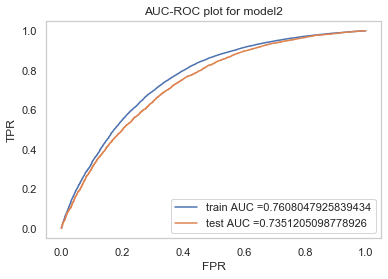

In [39]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, result2_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, result2_test)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC plot for model2")
plt.grid()
plt.show()

# Model3

In [40]:
X_train=X_train_copy
X_test=X_test_copy

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
clean_categories_vectorizer = CountVectorizer(vocabulary=list(set(X_train['clean_categories'].values)), lowercase=False, binary=True)
clean_categories_vectorizer.fit(X_train['clean_categories'].values)
print(clean_categories_vectorizer.get_feature_names())

#for train data
categories_one_hot_train = clean_categories_vectorizer.transform(X_train['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)


#for test
categories_one_hot_test = clean_categories_vectorizer.transform(X_test['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot_test.shape)

['health_sports specialneeds', 'music_arts health_sports', 'math_science warmth care_hunger', 'music_arts appliedlearning', 'music_arts history_civics', 'specialneeds health_sports', 'math_science appliedlearning', 'warmth care_hunger', 'history_civics', 'health_sports', 'appliedlearning history_civics', 'literacy_language appliedlearning', 'literacy_language music_arts', 'literacy_language math_science', 'math_science literacy_language', 'appliedlearning literacy_language', 'history_civics math_science', 'history_civics appliedlearning', 'health_sports warmth care_hunger', 'specialneeds music_arts', 'history_civics music_arts', 'history_civics specialneeds', 'health_sports appliedlearning', 'appliedlearning', 'music_arts', 'math_science specialneeds', 'health_sports music_arts', 'history_civics health_sports', 'health_sports history_civics', 'appliedlearning warmth care_hunger', 'specialneeds', 'music_arts warmth care_hunger', 'literacy_language health_sports', 'history_civics warmth 

In [42]:
clean_subcategories_vectorizer = CountVectorizer(vocabulary=list(set(X_train['clean_subcategories'].values)), lowercase=False, binary=True)
clean_subcategories_vectorizer.fit(X_train['clean_subcategories'].values)
print(clean_subcategories_vectorizer.get_feature_names())

#for train data
sub_categories_one_hot_train = clean_subcategories_vectorizer.transform(X_train['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_train.shape)

#for test
sub_categories_one_hot_test = clean_subcategories_vectorizer.transform(X_test['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_test.shape)

['foreignlanguages socialsciences', 'charactereducation literacy', 'earlydevelopment history_geography', 'esl nutritioneducation', 'communityservice health_wellness', 'extracurricular gym_fitness', 'appliedsciences warmth care_hunger', 'communityservice environmentalscience', 'civics_government visualarts', 'nutritioneducation', 'appliedsciences other', 'extracurricular socialsciences', 'esl earlydevelopment', 'other warmth care_hunger', 'literacy literature_writing', 'earlydevelopment music', 'communityservice music', 'foreignlanguages mathematics', 'college_careerprep specialneeds', 'communityservice mathematics', 'mathematics music', 'appliedsciences specialneeds', 'appliedsciences earlydevelopment', 'health_lifescience warmth care_hunger', 'earlydevelopment health_wellness', 'appliedsciences foreignlanguages', 'communityservice performingarts', 'health_lifescience literature_writing', 'literacy warmth care_hunger', 'charactereducation teamsports', 'socialsciences', 'charactereducat


Shape of matrix after one hot encodig  (87398, 395)
Shape of matrix after one hot encodig  (21850, 395)


In [43]:
# we use count vectorizer to convert the values into one hot encoded features
teacher_prefix_vectorizer = CountVectorizer(vocabulary=list(set(X_train['teacher_prefix'].values)), lowercase=False, binary=True)
teacher_prefix_vectorizer.fit(X_train['teacher_prefix'].values)
print(teacher_prefix_vectorizer.get_feature_names())

teacher_prefix_one_hot_train = teacher_prefix_vectorizer.transform(X_train['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)

teacher_prefix_one_hot_test = teacher_prefix_vectorizer.transform(X_test['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_test.shape)

['ms', 'mrs', 'dr', 'teacher', 'mr']
Shape of matrix after one hot encodig  (87398, 5)
Shape of matrix after one hot encodig  (21850, 5)


In [44]:
# we use count vectorizer to convert the values into one hot encoded features
project_grade_category_vectorizer = CountVectorizer(vocabulary=list(X_train['project_grade_category'].unique()), lowercase=False, binary=True)
project_grade_category_vectorizer.fit(X_train['project_grade_category'].values)
print(project_grade_category_vectorizer.get_feature_names())

project_grade_category_one_hot_train = project_grade_category_vectorizer.transform(X_train['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_train.shape)

project_grade_category_one_hot_test = project_grade_category_vectorizer.transform(X_test['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_test.shape)

['grades_prek_2', 'grades_6_8', 'grades_3_5', 'grades_9_12']
Shape of matrix after one hot encodig  (87398, 4)
Shape of matrix after one hot encodig  (21850, 4)


In [45]:
# we use count vectorizer to convert the values into one hot encoded features
school_state_vectorizer = CountVectorizer(vocabulary=list(set(X_train['school_state'].values)), lowercase=False, binary=True)
school_state_vectorizer.fit(X_train['school_state'].values)
print(school_state_vectorizer.get_feature_names())


school_state_one_hot_train = school_state_vectorizer.transform(X_train['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot_train.shape)

school_state_one_hot_test = school_state_vectorizer.transform(X_test['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot_test.shape)

['de', 'la', 'ne', 'nh', 'mo', 'ky', 'mt', 'pa', 'ut', 'nj', 'nd', 'in', 'ri', 'sc', 'wy', 'nm', 'or', 'ct', 'ma', 'md', 'wa', 'al', 'ak', 'hi', 'nv', 'dc', 'nc', 'ms', 'az', 'tn', 'ga', 'id', 'sd', 'wv', 'ny', 'ca', 'ia', 'ok', 'me', 'oh', 'fl', 'wi', 'mi', 'co', 'va', 'ks', 'mn', 'ar', 'tx', 'il', 'vt']
Shape of matrix after one hot encodig  (87398, 51)
Shape of matrix after one hot encodig  (21850, 51)


In [46]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
model3_other_than_text_train = hstack((categories_one_hot_train, sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,price_standardized_train,teacher_number_of_previously_posted_projects_standardized_train))
#print(model3_other_than_text_train.shape)
model3_other_than_text_train = model3_other_than_text_train.toarray()
model3_other_than_text_train = model3_other_than_text_train.reshape((87398, 504,1))
print(model3_other_than_text_train.shape)
model3_other_than_text_test = hstack((categories_one_hot_test, sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,price_standardized_test,teacher_number_of_previously_posted_projects_standardized_test))
#print(model3_other_than_text_test.shape)
#print(type(model3_other_than_text_test))
model3_other_than_text_test = model3_other_than_text_test.toarray()
#print(type(model3_other_than_text_test))
model3_other_than_text_test = model3_other_than_text_test.reshape((21850, 504,1))
#print(type(model3_other_than_text_test))
print(model3_other_than_text_test.shape)

(87398, 504, 1)
(21850, 504, 1)


In [47]:
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(X_train.essay)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs_text_train = t.texts_to_sequences(X_train.essay)
#print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 600
padded_docs_text_train = pad_sequences(encoded_docs_text_train, maxlen=max_length, padding='pre')
#print(padded_docs[0])
print(len(padded_docs_text_train))
print(len(padded_docs_text_train[0]))

# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.42B.300d.txt', 'r', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

87398
600
Loaded 1917495 word vectors.


In [48]:
encoded_docs_text_test = t.texts_to_sequences(X_test.essay)
#print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 600
padded_docs_text_test = pad_sequences(encoded_docs_text_test, maxlen=max_length, padding='pre')
#print(padded_docs[0])
print(len(padded_docs_text_train))
print(len(padded_docs_text_train[0]))

87398
600


In [49]:
from keras.layers import Input, Embedding, LSTM, Dense, concatenate, Flatten
from keras.models import Model
first_input = Input(shape=(600,))
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=600, trainable=False)(first_input)
lstm_out=LSTM(32)(e)

In [50]:
from keras.layers import Conv1D
model3_other_than_text_test_in = Input(shape=(504,1))
x = Conv1D(100,5,padding='valid',activation='relu')(model3_other_than_text_test_in)
x = Conv1D(100,3,padding='valid',activation='relu')(x)
model3_other_than_text_out = Flatten()(x)

In [51]:
from keras.layers.merge import concatenate
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout

concatenated = concatenate([lstm_out, model3_other_than_text_out])
intermediate_out = Dense(1024, activation='relu')(concatenated)
out=Dropout(0.3)(intermediate_out)
out=Dense(512, activation='relu')(out)
out=Dropout(0.3)(out)
out=Dense(128, activation='relu')(out)
out=Dense(1, activation='sigmoid', name='main_output')(out)

merged_model3 = Model(inputs= [first_input, model3_other_than_text_test_in], outputs=[out])
print(merged_model3.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 504, 1)       0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           (None, 600)          0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 500, 100)     600         input_16[0][0]                   
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 600, 300)     7658100     input_15[0][0]                   
__________________________________________________________________________________________________
conv1d_2 (

In [52]:
from time import time
from keras.callbacks import TensorBoard
tensorboard=TensorBoard(log_dir="logs\{}".format(time()))


In [53]:
merged_model3.compile(optimizer='adam', loss='binary_crossentropy',metrics=["accuracy",auc_roc])

In [54]:
from keras.callbacks import ModelCheckpoint
filepath="weights-improvement-model3.hdf5"
checkpoint = ModelCheckpoint(filepath, verbose=1,monitor="val_auc_roc", save_best_only=True, mode='max')
callbacks_list = [tensorboard,checkpoint]

In [55]:
merged_model3.fit([padded_docs_text_train, model3_other_than_text_train], [y_train],epochs=50, batch_size=1024,callbacks=callbacks_list,validation_split=0.2)

Train on 69918 samples, validate on 17480 samples
Epoch 1/50
69918/69918 [==============================] - ETA: 4:24 - loss: 0.6935 - acc: 0.4688 - auc_roc: 0.483 - ETA: 2:32 - loss: 0.6232 - acc: 0.6665 - auc_roc: 0.505 - ETA: 1:54 - loss: 0.5672 - acc: 0.7259 - auc_roc: 0.504 - ETA: 1:35 - loss: 0.5395 - acc: 0.7571 - auc_roc: 0.502 - ETA: 1:23 - loss: 0.5174 - acc: 0.7758 - auc_roc: 0.499 - ETA: 1:15 - loss: 0.4973 - acc: 0.7926 - auc_roc: 0.510 - ETA: 1:09 - loss: 0.4879 - acc: 0.8011 - auc_roc: 0.510 - ETA: 1:04 - loss: 0.4839 - acc: 0.8048 - auc_roc: 0.514 - ETA: 1:00 - loss: 0.4820 - acc: 0.8074 - auc_roc: 0.515 - ETA: 57s - loss: 0.4761 - acc: 0.8119 - auc_roc: 0.515 - ETA: 55s - loss: 0.4724 - acc: 0.8151 - auc_roc: 0.51 - ETA: 53s - loss: 0.4672 - acc: 0.8186 - auc_roc: 0.51 - ETA: 50s - loss: 0.4654 - acc: 0.8199 - auc_roc: 0.52 - ETA: 48s - loss: 0.4623 - acc: 0.8225 - auc_roc: 0.51 - ETA: 47s - loss: 0.4603 - acc: 0.8238 - auc_roc: 0.52 - ETA: 45s - loss: 0.4566 - acc: 0.

Epoch 00004: val_auc_roc improved from 0.74309 to 0.75061, saving model to weights-improvement-model3.hdf5
Epoch 5/50
69918/69918 [==============================] - ETA: 45s - loss: 0.3577 - acc: 0.8613 - auc_roc: 0.76 - ETA: 45s - loss: 0.3460 - acc: 0.8682 - auc_roc: 0.77 - ETA: 44s - loss: 0.3428 - acc: 0.8688 - auc_roc: 0.77 - ETA: 43s - loss: 0.3419 - acc: 0.8689 - auc_roc: 0.78 - ETA: 42s - loss: 0.3442 - acc: 0.8662 - auc_roc: 0.77 - ETA: 41s - loss: 0.3457 - acc: 0.8657 - auc_roc: 0.78 - ETA: 40s - loss: 0.3428 - acc: 0.8670 - auc_roc: 0.77 - ETA: 40s - loss: 0.3442 - acc: 0.8666 - auc_roc: 0.77 - ETA: 39s - loss: 0.3458 - acc: 0.8657 - auc_roc: 0.77 - ETA: 38s - loss: 0.3471 - acc: 0.8649 - auc_roc: 0.77 - ETA: 38s - loss: 0.3507 - acc: 0.8626 - auc_roc: 0.77 - ETA: 37s - loss: 0.3531 - acc: 0.8622 - auc_roc: 0.77 - ETA: 36s - loss: 0.3533 - acc: 0.8621 - auc_roc: 0.77 - ETA: 36s - loss: 0.3540 - acc: 0.8615 - auc_roc: 0.77 - ETA: 35s - loss: 0.3552 - acc: 0.8609 - auc_roc: 0.

Epoch 00008: val_auc_roc did not improve from 0.75507
Epoch 9/50
69918/69918 [==============================] - ETA: 44s - loss: 0.3625 - acc: 0.8545 - auc_roc: 0.80 - ETA: 43s - loss: 0.3607 - acc: 0.8516 - auc_roc: 0.80 - ETA: 43s - loss: 0.3526 - acc: 0.8584 - auc_roc: 0.80 - ETA: 43s - loss: 0.3534 - acc: 0.8589 - auc_roc: 0.80 - ETA: 42s - loss: 0.3454 - acc: 0.8627 - auc_roc: 0.81 - ETA: 42s - loss: 0.3448 - acc: 0.8646 - auc_roc: 0.81 - ETA: 41s - loss: 0.3431 - acc: 0.8668 - auc_roc: 0.80 - ETA: 40s - loss: 0.3428 - acc: 0.8661 - auc_roc: 0.80 - ETA: 39s - loss: 0.3406 - acc: 0.8661 - auc_roc: 0.81 - ETA: 38s - loss: 0.3455 - acc: 0.8644 - auc_roc: 0.80 - ETA: 38s - loss: 0.3437 - acc: 0.8654 - auc_roc: 0.80 - ETA: 37s - loss: 0.3439 - acc: 0.8649 - auc_roc: 0.80 - ETA: 37s - loss: 0.3453 - acc: 0.8646 - auc_roc: 0.80 - ETA: 36s - loss: 0.3449 - acc: 0.8650 - auc_roc: 0.80 - ETA: 35s - loss: 0.3428 - acc: 0.8661 - auc_roc: 0.80 - ETA: 35s - loss: 0.3432 - acc: 0.8655 - auc_roc:

69918/69918 [==============================] - ETA: 49s - loss: 0.3224 - acc: 0.8740 - auc_roc: 0.83 - ETA: 46s - loss: 0.3156 - acc: 0.8799 - auc_roc: 0.83 - ETA: 45s - loss: 0.3120 - acc: 0.8825 - auc_roc: 0.83 - ETA: 44s - loss: 0.3060 - acc: 0.8850 - auc_roc: 0.83 - ETA: 43s - loss: 0.3076 - acc: 0.8836 - auc_roc: 0.83 - ETA: 42s - loss: 0.3072 - acc: 0.8835 - auc_roc: 0.83 - ETA: 41s - loss: 0.3054 - acc: 0.8836 - auc_roc: 0.84 - ETA: 40s - loss: 0.3084 - acc: 0.8828 - auc_roc: 0.83 - ETA: 39s - loss: 0.3109 - acc: 0.8814 - auc_roc: 0.83 - ETA: 38s - loss: 0.3084 - acc: 0.8820 - auc_roc: 0.84 - ETA: 38s - loss: 0.3073 - acc: 0.8824 - auc_roc: 0.84 - ETA: 37s - loss: 0.3062 - acc: 0.8826 - auc_roc: 0.84 - ETA: 36s - loss: 0.3077 - acc: 0.8818 - auc_roc: 0.84 - ETA: 36s - loss: 0.3060 - acc: 0.8820 - auc_roc: 0.84 - ETA: 35s - loss: 0.3041 - acc: 0.8831 - auc_roc: 0.84 - ETA: 34s - loss: 0.3055 - acc: 0.8826 - auc_roc: 0.84 - ETA: 34s - loss: 0.3042 - acc: 0.8833 - auc_roc: 0.84 - E

69918/69918 [==============================] - ETA: 46s - loss: 0.2919 - acc: 0.8818 - auc_roc: 0.87 - ETA: 45s - loss: 0.2859 - acc: 0.8892 - auc_roc: 0.87 - ETA: 43s - loss: 0.2848 - acc: 0.8910 - auc_roc: 0.87 - ETA: 42s - loss: 0.2744 - acc: 0.8960 - auc_roc: 0.87 - ETA: 42s - loss: 0.2666 - acc: 0.9002 - auc_roc: 0.88 - ETA: 41s - loss: 0.2706 - acc: 0.8979 - auc_roc: 0.88 - ETA: 40s - loss: 0.2693 - acc: 0.8986 - auc_roc: 0.88 - ETA: 39s - loss: 0.2725 - acc: 0.8975 - auc_roc: 0.87 - ETA: 39s - loss: 0.2728 - acc: 0.8976 - auc_roc: 0.87 - ETA: 38s - loss: 0.2716 - acc: 0.8981 - auc_roc: 0.87 - ETA: 37s - loss: 0.2700 - acc: 0.8983 - auc_roc: 0.87 - ETA: 36s - loss: 0.2699 - acc: 0.8980 - auc_roc: 0.88 - ETA: 36s - loss: 0.2708 - acc: 0.8976 - auc_roc: 0.88 - ETA: 35s - loss: 0.2690 - acc: 0.8987 - auc_roc: 0.88 - ETA: 35s - loss: 0.2697 - acc: 0.8989 - auc_roc: 0.88 - ETA: 34s - loss: 0.2691 - acc: 0.8994 - auc_roc: 0.88 - ETA: 33s - loss: 0.2691 - acc: 0.8991 - auc_roc: 0.88 - E

69918/69918 [==============================] - ETA: 48s - loss: 0.2414 - acc: 0.9043 - auc_roc: 0.90 - ETA: 44s - loss: 0.2252 - acc: 0.9160 - auc_roc: 0.91 - ETA: 43s - loss: 0.2246 - acc: 0.9183 - auc_roc: 0.91 - ETA: 42s - loss: 0.2321 - acc: 0.9141 - auc_roc: 0.91 - ETA: 41s - loss: 0.2344 - acc: 0.9137 - auc_roc: 0.91 - ETA: 40s - loss: 0.2289 - acc: 0.9162 - auc_roc: 0.91 - ETA: 40s - loss: 0.2274 - acc: 0.9156 - auc_roc: 0.91 - ETA: 39s - loss: 0.2241 - acc: 0.9166 - auc_roc: 0.91 - ETA: 38s - loss: 0.2235 - acc: 0.9168 - auc_roc: 0.91 - ETA: 38s - loss: 0.2202 - acc: 0.9186 - auc_roc: 0.91 - ETA: 37s - loss: 0.2203 - acc: 0.9189 - auc_roc: 0.91 - ETA: 36s - loss: 0.2229 - acc: 0.9172 - auc_roc: 0.91 - ETA: 36s - loss: 0.2217 - acc: 0.9186 - auc_roc: 0.91 - ETA: 35s - loss: 0.2197 - acc: 0.9196 - auc_roc: 0.91 - ETA: 35s - loss: 0.2198 - acc: 0.9193 - auc_roc: 0.92 - ETA: 34s - loss: 0.2184 - acc: 0.9199 - auc_roc: 0.92 - ETA: 33s - loss: 0.2202 - acc: 0.9191 - auc_roc: 0.91 - E

69918/69918 [==============================] - ETA: 46s - loss: 0.1946 - acc: 0.9209 - auc_roc: 0.95 - ETA: 44s - loss: 0.1803 - acc: 0.9341 - auc_roc: 0.95 - ETA: 44s - loss: 0.1704 - acc: 0.9368 - auc_roc: 0.95 - ETA: 43s - loss: 0.1729 - acc: 0.9346 - auc_roc: 0.95 - ETA: 42s - loss: 0.1799 - acc: 0.9313 - auc_roc: 0.95 - ETA: 41s - loss: 0.1835 - acc: 0.9295 - auc_roc: 0.94 - ETA: 41s - loss: 0.1855 - acc: 0.9287 - auc_roc: 0.94 - ETA: 40s - loss: 0.1858 - acc: 0.9293 - auc_roc: 0.94 - ETA: 39s - loss: 0.1871 - acc: 0.9280 - auc_roc: 0.94 - ETA: 38s - loss: 0.1847 - acc: 0.9295 - auc_roc: 0.94 - ETA: 38s - loss: 0.1837 - acc: 0.9306 - auc_roc: 0.94 - ETA: 37s - loss: 0.1837 - acc: 0.9310 - auc_roc: 0.94 - ETA: 36s - loss: 0.1822 - acc: 0.9313 - auc_roc: 0.94 - ETA: 36s - loss: 0.1796 - acc: 0.9324 - auc_roc: 0.95 - ETA: 35s - loss: 0.1805 - acc: 0.9324 - auc_roc: 0.94 - ETA: 34s - loss: 0.1798 - acc: 0.9322 - auc_roc: 0.95 - ETA: 34s - loss: 0.1790 - acc: 0.9327 - auc_roc: 0.95 - E

69918/69918 [==============================] - ETA: 44s - loss: 0.1191 - acc: 0.9551 - auc_roc: 0.98 - ETA: 44s - loss: 0.1252 - acc: 0.9517 - auc_roc: 0.98 - ETA: 43s - loss: 0.1307 - acc: 0.9512 - auc_roc: 0.97 - ETA: 42s - loss: 0.1379 - acc: 0.9490 - auc_roc: 0.97 - ETA: 42s - loss: 0.1396 - acc: 0.9477 - auc_roc: 0.97 - ETA: 41s - loss: 0.1400 - acc: 0.9473 - auc_roc: 0.97 - ETA: 41s - loss: 0.1415 - acc: 0.9463 - auc_roc: 0.97 - ETA: 40s - loss: 0.1400 - acc: 0.9467 - auc_roc: 0.97 - ETA: 39s - loss: 0.1409 - acc: 0.9465 - auc_roc: 0.97 - ETA: 39s - loss: 0.1405 - acc: 0.9463 - auc_roc: 0.97 - ETA: 38s - loss: 0.1398 - acc: 0.9462 - auc_roc: 0.97 - ETA: 38s - loss: 0.1413 - acc: 0.9462 - auc_roc: 0.97 - ETA: 37s - loss: 0.1394 - acc: 0.9478 - auc_roc: 0.97 - ETA: 36s - loss: 0.1400 - acc: 0.9471 - auc_roc: 0.97 - ETA: 35s - loss: 0.1405 - acc: 0.9469 - auc_roc: 0.97 - ETA: 35s - loss: 0.1406 - acc: 0.9467 - auc_roc: 0.97 - ETA: 34s - loss: 0.1407 - acc: 0.9466 - auc_roc: 0.97 - E

69918/69918 [==============================] - ETA: 42s - loss: 0.0916 - acc: 0.9639 - auc_roc: 0.98 - ETA: 42s - loss: 0.0944 - acc: 0.9614 - auc_roc: 0.98 - ETA: 42s - loss: 0.0956 - acc: 0.9616 - auc_roc: 0.98 - ETA: 41s - loss: 0.0981 - acc: 0.9600 - auc_roc: 0.98 - ETA: 41s - loss: 0.0976 - acc: 0.9607 - auc_roc: 0.98 - ETA: 40s - loss: 0.0986 - acc: 0.9616 - auc_roc: 0.98 - ETA: 40s - loss: 0.0973 - acc: 0.9628 - auc_roc: 0.98 - ETA: 39s - loss: 0.0967 - acc: 0.9624 - auc_roc: 0.98 - ETA: 38s - loss: 0.0962 - acc: 0.9634 - auc_roc: 0.98 - ETA: 38s - loss: 0.0958 - acc: 0.9636 - auc_roc: 0.98 - ETA: 37s - loss: 0.0965 - acc: 0.9636 - auc_roc: 0.98 - ETA: 37s - loss: 0.0975 - acc: 0.9640 - auc_roc: 0.98 - ETA: 36s - loss: 0.0970 - acc: 0.9642 - auc_roc: 0.98 - ETA: 35s - loss: 0.0989 - acc: 0.9634 - auc_roc: 0.98 - ETA: 35s - loss: 0.0994 - acc: 0.9632 - auc_roc: 0.98 - ETA: 34s - loss: 0.1011 - acc: 0.9629 - auc_roc: 0.98 - ETA: 33s - loss: 0.1020 - acc: 0.9625 - auc_roc: 0.98 - E

69918/69918 [==============================] - ETA: 42s - loss: 0.0804 - acc: 0.9736 - auc_roc: 0.99 - ETA: 43s - loss: 0.0831 - acc: 0.9688 - auc_roc: 0.99 - ETA: 42s - loss: 0.0823 - acc: 0.9701 - auc_roc: 0.99 - ETA: 41s - loss: 0.0806 - acc: 0.9707 - auc_roc: 0.99 - ETA: 41s - loss: 0.0882 - acc: 0.9676 - auc_roc: 0.98 - ETA: 40s - loss: 0.0859 - acc: 0.9683 - auc_roc: 0.98 - ETA: 39s - loss: 0.0851 - acc: 0.9678 - auc_roc: 0.99 - ETA: 39s - loss: 0.0839 - acc: 0.9680 - auc_roc: 0.99 - ETA: 38s - loss: 0.0835 - acc: 0.9680 - auc_roc: 0.99 - ETA: 38s - loss: 0.0829 - acc: 0.9685 - auc_roc: 0.99 - ETA: 37s - loss: 0.0812 - acc: 0.9692 - auc_roc: 0.99 - ETA: 36s - loss: 0.0804 - acc: 0.9693 - auc_roc: 0.99 - ETA: 36s - loss: 0.0791 - acc: 0.9705 - auc_roc: 0.99 - ETA: 35s - loss: 0.0795 - acc: 0.9705 - auc_roc: 0.99 - ETA: 34s - loss: 0.0787 - acc: 0.9708 - auc_roc: 0.99 - ETA: 34s - loss: 0.0773 - acc: 0.9711 - auc_roc: 0.99 - ETA: 33s - loss: 0.0783 - acc: 0.9705 - auc_roc: 0.99 - E

69918/69918 [==============================] - ETA: 43s - loss: 0.0594 - acc: 0.9766 - auc_roc: 0.99 - ETA: 44s - loss: 0.0569 - acc: 0.9771 - auc_roc: 0.99 - ETA: 43s - loss: 0.0607 - acc: 0.9759 - auc_roc: 0.99 - ETA: 42s - loss: 0.0620 - acc: 0.9761 - auc_roc: 0.99 - ETA: 41s - loss: 0.0646 - acc: 0.9750 - auc_roc: 0.99 - ETA: 41s - loss: 0.0645 - acc: 0.9754 - auc_roc: 0.99 - ETA: 41s - loss: 0.0656 - acc: 0.9749 - auc_roc: 0.99 - ETA: 40s - loss: 0.0643 - acc: 0.9756 - auc_roc: 0.99 - ETA: 39s - loss: 0.0649 - acc: 0.9750 - auc_roc: 0.99 - ETA: 38s - loss: 0.0633 - acc: 0.9756 - auc_roc: 0.99 - ETA: 38s - loss: 0.0646 - acc: 0.9750 - auc_roc: 0.99 - ETA: 37s - loss: 0.0658 - acc: 0.9748 - auc_roc: 0.99 - ETA: 36s - loss: 0.0657 - acc: 0.9748 - auc_roc: 0.99 - ETA: 36s - loss: 0.0652 - acc: 0.9750 - auc_roc: 0.99 - ETA: 35s - loss: 0.0667 - acc: 0.9747 - auc_roc: 0.99 - ETA: 34s - loss: 0.0672 - acc: 0.9747 - auc_roc: 0.99 - ETA: 34s - loss: 0.0677 - acc: 0.9745 - auc_roc: 0.99 - E

69918/69918 [==============================] - ETA: 44s - loss: 0.0432 - acc: 0.9873 - auc_roc: 0.99 - ETA: 44s - loss: 0.0537 - acc: 0.9829 - auc_roc: 0.99 - ETA: 43s - loss: 0.0502 - acc: 0.9831 - auc_roc: 0.99 - ETA: 42s - loss: 0.0516 - acc: 0.9817 - auc_roc: 0.99 - ETA: 42s - loss: 0.0517 - acc: 0.9822 - auc_roc: 0.99 - ETA: 41s - loss: 0.0526 - acc: 0.9821 - auc_roc: 0.99 - ETA: 40s - loss: 0.0517 - acc: 0.9819 - auc_roc: 0.99 - ETA: 39s - loss: 0.0522 - acc: 0.9818 - auc_roc: 0.99 - ETA: 39s - loss: 0.0515 - acc: 0.9821 - auc_roc: 0.99 - ETA: 38s - loss: 0.0558 - acc: 0.9805 - auc_roc: 0.99 - ETA: 37s - loss: 0.0552 - acc: 0.9806 - auc_roc: 0.99 - ETA: 37s - loss: 0.0554 - acc: 0.9802 - auc_roc: 0.99 - ETA: 36s - loss: 0.0580 - acc: 0.9792 - auc_roc: 0.99 - ETA: 36s - loss: 0.0584 - acc: 0.9791 - auc_roc: 0.99 - ETA: 35s - loss: 0.0586 - acc: 0.9789 - auc_roc: 0.99 - ETA: 34s - loss: 0.0577 - acc: 0.9791 - auc_roc: 0.99 - ETA: 33s - loss: 0.0569 - acc: 0.9790 - auc_roc: 0.99 - E

69918/69918 [==============================] - ETA: 43s - loss: 0.0348 - acc: 0.9893 - auc_roc: 0.99 - ETA: 43s - loss: 0.0411 - acc: 0.9868 - auc_roc: 0.99 - ETA: 42s - loss: 0.0446 - acc: 0.9854 - auc_roc: 0.99 - ETA: 42s - loss: 0.0455 - acc: 0.9846 - auc_roc: 0.99 - ETA: 41s - loss: 0.0473 - acc: 0.9834 - auc_roc: 0.99 - ETA: 41s - loss: 0.0455 - acc: 0.9844 - auc_roc: 0.99 - ETA: 40s - loss: 0.0458 - acc: 0.9840 - auc_roc: 0.99 - ETA: 39s - loss: 0.0486 - acc: 0.9829 - auc_roc: 0.99 - ETA: 39s - loss: 0.0478 - acc: 0.9830 - auc_roc: 0.99 - ETA: 38s - loss: 0.0465 - acc: 0.9831 - auc_roc: 0.99 - ETA: 37s - loss: 0.0455 - acc: 0.9835 - auc_roc: 0.99 - ETA: 37s - loss: 0.0455 - acc: 0.9832 - auc_roc: 0.99 - ETA: 36s - loss: 0.0455 - acc: 0.9829 - auc_roc: 0.99 - ETA: 35s - loss: 0.0456 - acc: 0.9826 - auc_roc: 0.99 - ETA: 34s - loss: 0.0458 - acc: 0.9824 - auc_roc: 0.99 - ETA: 34s - loss: 0.0460 - acc: 0.9824 - auc_roc: 0.99 - ETA: 33s - loss: 0.0448 - acc: 0.9830 - auc_roc: 0.99 - E

In [56]:
merged_model3 = load_model('weights-improvement-model3.hdf5', custom_objects={'auc_roc': auc_roc})

In [57]:
result3_test = merged_model3.predict(x=[padded_docs_text_test, model3_other_than_text_test])

In [58]:
result3_train = merged_model3.predict(x=[padded_docs_text_train, model3_other_than_text_train])

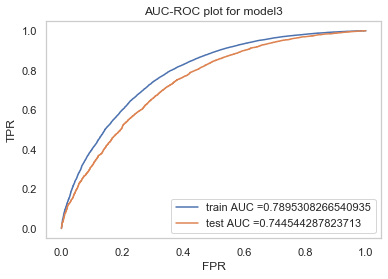

In [59]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, result3_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, result3_test)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC plot for model3")
plt.grid()
plt.show()

In [60]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "train auc","test auc"]
x.add_row(["Model 1", 0.79, 0.75])
x.add_row(["Model 2", 0.77, 0.73])
x.add_row(["Model 3", 0.78, 0.74])

x.border=True
print(x)

+---------+-----------+----------+
|  Model  | train auc | test auc |
+---------+-----------+----------+
| Model 1 |    0.79   |   0.75   |
| Model 2 |    0.77   |   0.73   |
| Model 3 |    0.78   |   0.74   |
+---------+-----------+----------+


### Error plots generated in tensorboard

#### Model1 loss (train -test)

![Model1 train loss](model_1_loss.png)

![Model1 validation loss](model_1_val_loss.png)

#### Model1 accuracy (train -test)

![Model1 train accuracy](model_1_acc.png)

![Model1 validation accuracy](model_1_acc.png)

#### Model1 auc-roc (train -test)

![Model1 train auc](model_1_auc_roc.png)

![Model1 validation auc](model_1_val_auc_roc.png)

#### Model2 loss (train -test)

![Model2 train loss](model_2_loss.png)

![Model2 validation loss](model_2_val_loss.png)

#### Model2 accuracy (train -test)

![Model2 train accuaracy](model_2_acc.png)

![Model2 validation accuracy](model_2_val_acc.png)

#### Model2 auc-roc (train -test)

![Model2 train auc](model_2_auc_roc.png)

![Model2 validation auc](model_2_val_auc_roc.png)

#### Model3 loss (train -test)

![Model3 train loss](model_3_loss.png)

![Model3 validation loss](model_3_val_loss.png)

#### Model3 accuracy (train -test)

![Model3 train accuracy](model_3_acc.png)

![Model3 validation accuracy](model_3_val_acc.png)

#### Model3 auc-roc (train -test)

![Model3 train auc](model_3_auc_roc.png)

![Model3 validation auc](model_3_val_auc_roc.png)